In [163]:
! pip install stats

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,t,binom,expon,chi2,chisquare,chi2_contingency,ttest_1samp,ttest_rel,ttest_ind,f_oneway,kruskal,levene,shapiro,kstest
import datetime as dt
from statsmodels.graphics.gofplots import qqplot

In [2]:
df=pd.read_csv('yulu_bike_sharing.csv')

In [100]:
df_original=pd.read_csv('yulu_bike_sharing.csv')

In [102]:
df_original['datetime']=pd.to_datetime(df['datetime'])

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df['datetime']=pd.to_datetime(df['datetime'])

In [5]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
df['date']=df['datetime'].dt.date

In [8]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19


In [9]:
df['time']=df['datetime'].dt.time

In [10]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19:00:00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20:00:00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21:00:00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22:00:00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  object        
 13  time        10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(2)
memory usage: 1.2+ MB


In [12]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
time          0
dtype: int64

### No missing values in teh data

In [13]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [14]:
df['date'].nunique()

456

In [15]:
df.describe(include=object)

,date,time
count,10886,10886
unique,456,24
top,2011-01-01,12:00:00
freq,24,456


In [16]:
df['date'].max(),df['date'].min()

(datetime.date(2012, 12, 19), datetime.date(2011, 1, 1))

In [17]:
df['year_month']=df['datetime'].dt.to_period('M')

In [18]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00:00:00,2011-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01:00:00,2011-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02:00:00,2011-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03:00:00,2011-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04:00:00,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19:00:00,2012-12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20:00:00,2012-12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21:00:00,2012-12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22:00:00,2012-12


In [68]:
df1=df[df['datetime']>='2012-01-01']

In [69]:
df1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,year_month
5422,2012-01-01 00:00:00,1,0,0,1,14.76,18.940,66,0.0000,5,43,48,2012-01-01,00:00:00,2012-01
5423,2012-01-01 01:00:00,1,0,0,1,14.76,17.425,66,8.9981,15,78,93,2012-01-01,01:00:00,2012-01
5424,2012-01-01 02:00:00,1,0,0,1,13.12,17.425,76,0.0000,16,59,75,2012-01-01,02:00:00,2012-01
5425,2012-01-01 03:00:00,1,0,0,1,12.30,16.665,81,0.0000,11,41,52,2012-01-01,03:00:00,2012-01
5426,2012-01-01 04:00:00,1,0,0,1,11.48,15.150,81,6.0032,0,8,8,2012-01-01,04:00:00,2012-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19:00:00,2012-12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20:00:00,2012-12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21:00:00,2012-12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22:00:00,2012-12


In [78]:
df11=df[(df['datetime']>='2012-01-01') & (df['datetime']<='2012-01-31')]

In [79]:
df11

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,year_month
5422,2012-01-01 00:00:00,1,0,0,1,14.76,18.940,66,0.0000,5,43,48,2012-01-01,00:00:00,2012-01
5423,2012-01-01 01:00:00,1,0,0,1,14.76,17.425,66,8.9981,15,78,93,2012-01-01,01:00:00,2012-01
5424,2012-01-01 02:00:00,1,0,0,1,13.12,17.425,76,0.0000,16,59,75,2012-01-01,02:00:00,2012-01
5425,2012-01-01 03:00:00,1,0,0,1,12.30,16.665,81,0.0000,11,41,52,2012-01-01,03:00:00,2012-01
5426,2012-01-01 04:00:00,1,0,0,1,11.48,15.150,81,6.0032,0,8,8,2012-01-01,04:00:00,2012-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,2012-01-19 19:00:00,1,0,1,2,10.66,11.365,48,19.9995,5,229,234,2012-01-19,19:00:00,2012-01
5871,2012-01-19 20:00:00,1,0,1,1,10.66,10.605,52,30.0026,7,184,191,2012-01-19,20:00:00,2012-01
5872,2012-01-19 21:00:00,1,0,1,1,10.66,11.365,44,23.9994,4,117,121,2012-01-19,21:00:00,2012-01
5873,2012-01-19 22:00:00,1,0,1,2,10.66,11.365,44,27.9993,0,90,90,2012-01-19,22:00:00,2012-01


In [83]:
df111=df[(df['datetime']>='2012-01-01') & (df['datetime']<='2012-01-07')]

In [84]:
df111

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,year_month
5422,2012-01-01 00:00:00,1,0,0,1,14.76,18.940,66,0.0000,5,43,48,2012-01-01,00:00:00,2012-01
5423,2012-01-01 01:00:00,1,0,0,1,14.76,17.425,66,8.9981,15,78,93,2012-01-01,01:00:00,2012-01
5424,2012-01-01 02:00:00,1,0,0,1,13.12,17.425,76,0.0000,16,59,75,2012-01-01,02:00:00,2012-01
5425,2012-01-01 03:00:00,1,0,0,1,12.30,16.665,81,0.0000,11,41,52,2012-01-01,03:00:00,2012-01
5426,2012-01-01 04:00:00,1,0,0,1,11.48,15.150,81,6.0032,0,8,8,2012-01-01,04:00:00,2012-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,2012-01-06 20:00:00,1,0,1,1,17.22,21.210,41,12.9980,14,163,177,2012-01-06,20:00:00,2012-01
5562,2012-01-06 21:00:00,1,0,1,1,16.40,20.455,43,15.0013,17,137,154,2012-01-06,21:00:00,2012-01
5563,2012-01-06 22:00:00,1,0,1,1,14.76,17.425,50,12.9980,12,123,135,2012-01-06,22:00:00,2012-01
5564,2012-01-06 23:00:00,1,0,1,1,14.76,18.940,50,0.0000,13,88,101,2012-01-06,23:00:00,2012-01


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  object        
 13  time        10886 non-null  object        
 14  year_month  10886 non-null  period[M]     
dtypes: datetime64[ns](1), float64(3), int64(8), object(2), period[M](1)
me

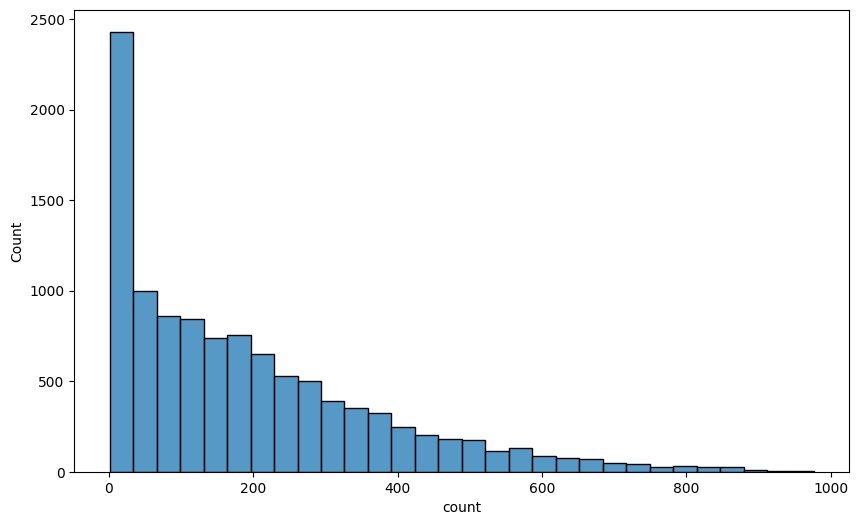

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='count',bins=30)
plt.show()

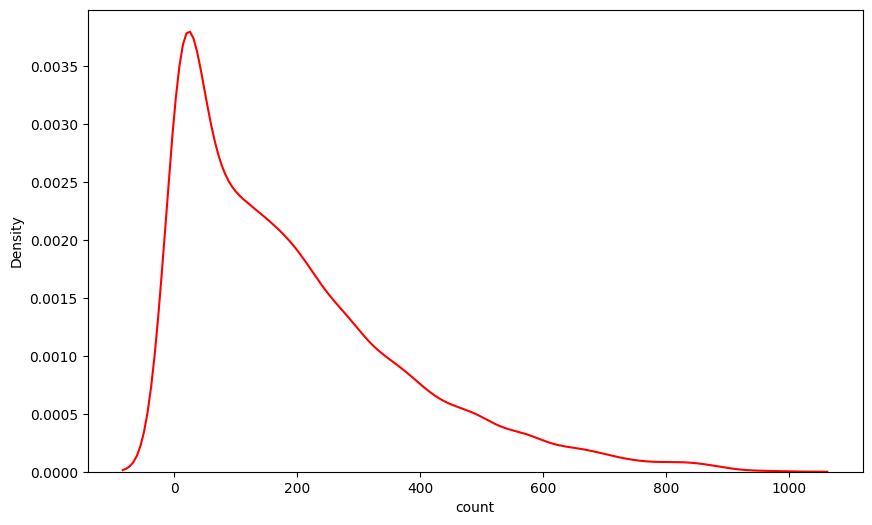

In [179]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=df['count'],c='red')
plt.show()

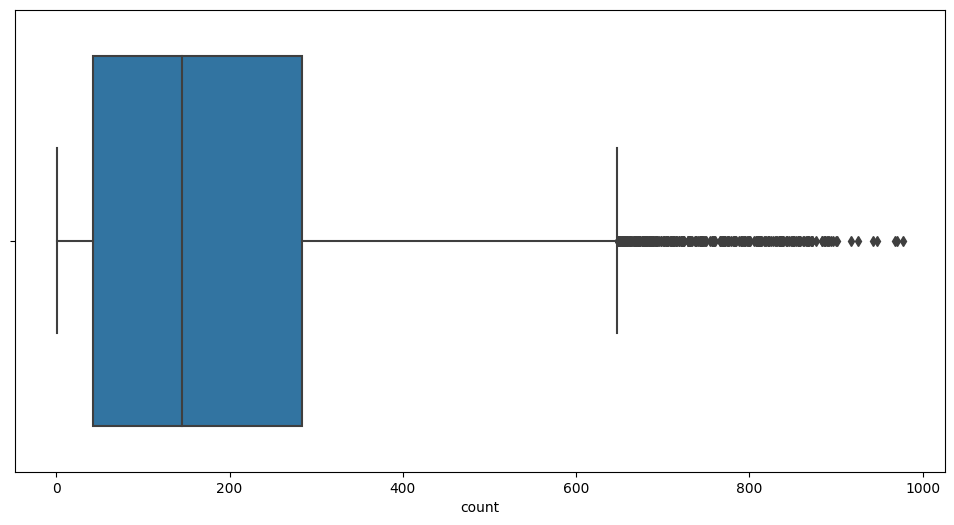

In [180]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['count'])
plt.show()

## many outliers observed in various features; but no treatment of outliers done...

<Axes: xlabel='count', ylabel='Count'>

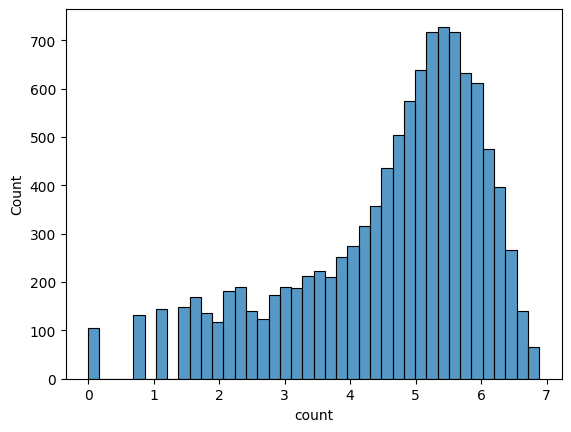

In [178]:
sns.histplot(np.log(df['count']))

## bike usage in not normally distributed. looks like it is slightly lognormally distributed

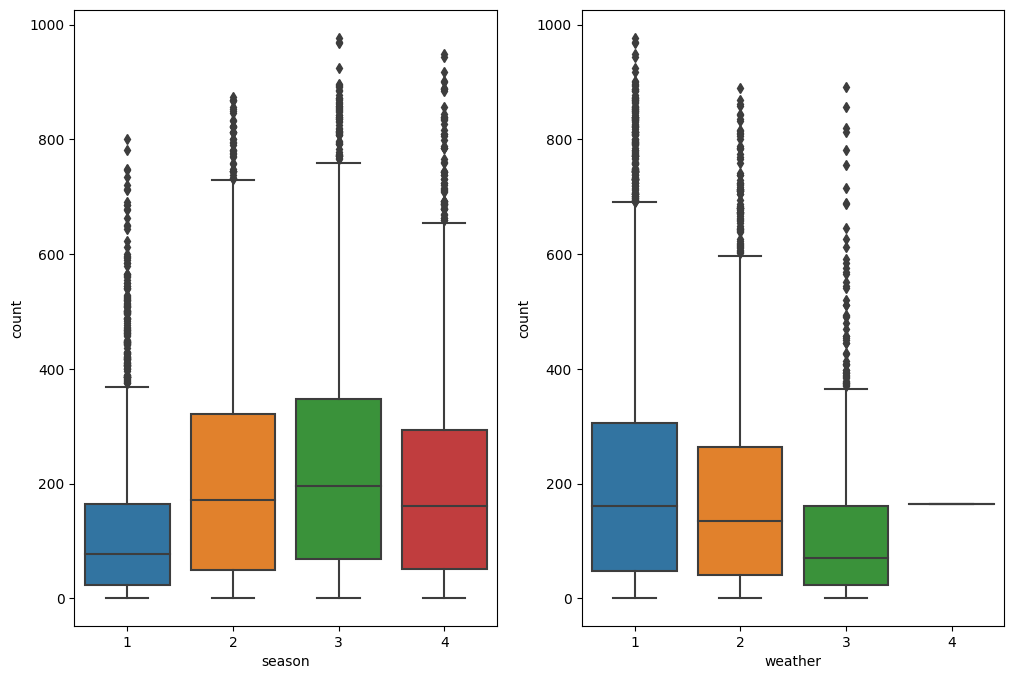

In [63]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='season', y='count')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='weather', y='count')
plt.show()


### season 3 shows more bike usage compared to other seasons; season 1  shows the least usage of bikes
### season 1: spring     season 2: summer   season 3: fall    season 4: winter

### weather 1 shows more bike usage than other weathers; 
### heavy rainy weather do not show much data of bike usage
### weather 1: clear    weather 2: mist    weather 3: light rain    weather 4: heavy rain


In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='season', y='count')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='weather', y='count')
plt.show()


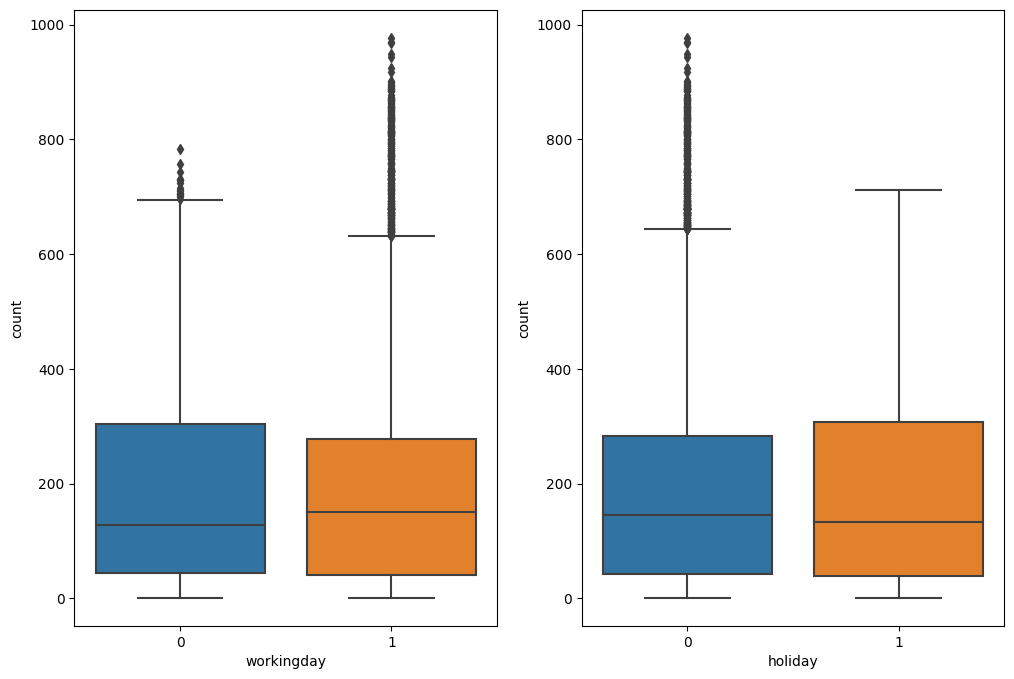

In [62]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='workingday', y='count')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='holiday', y='count')
plt.show()

[]

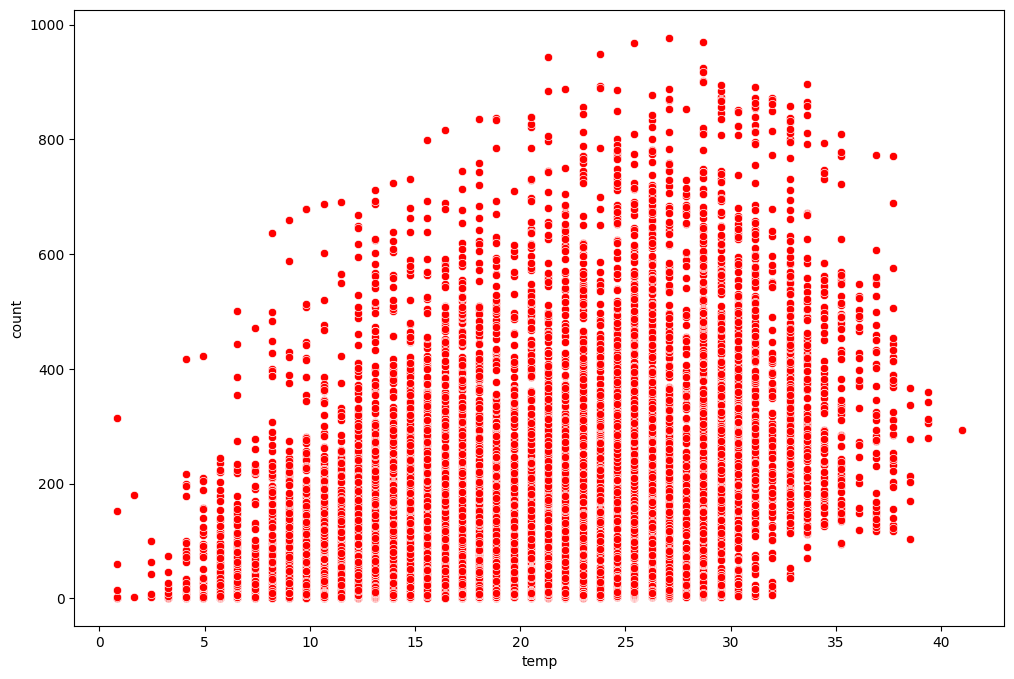

In [57]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='temp',y='count',c='red')
plt.plot()


### low temperature (less than 5 degree celcius) shows less bike usage based on the scatter plot

[]

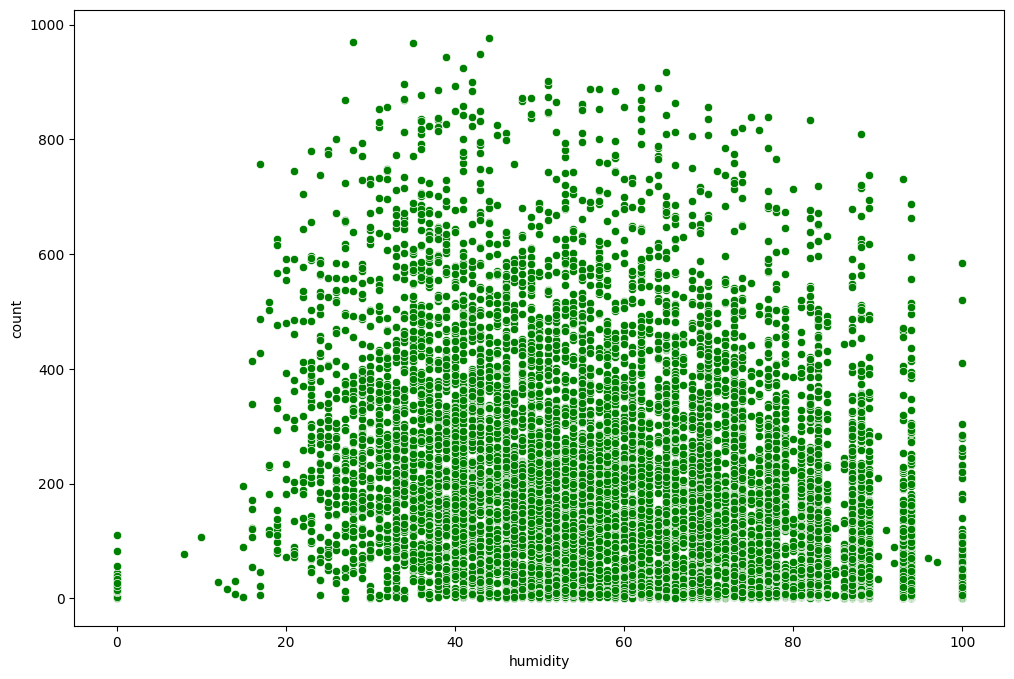

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='humidity',y='count',c='green')
plt.plot()


### low humidity ( less than 20%) shows less bike usage; 
### very high (>90% humidity also shows lesser bike usage

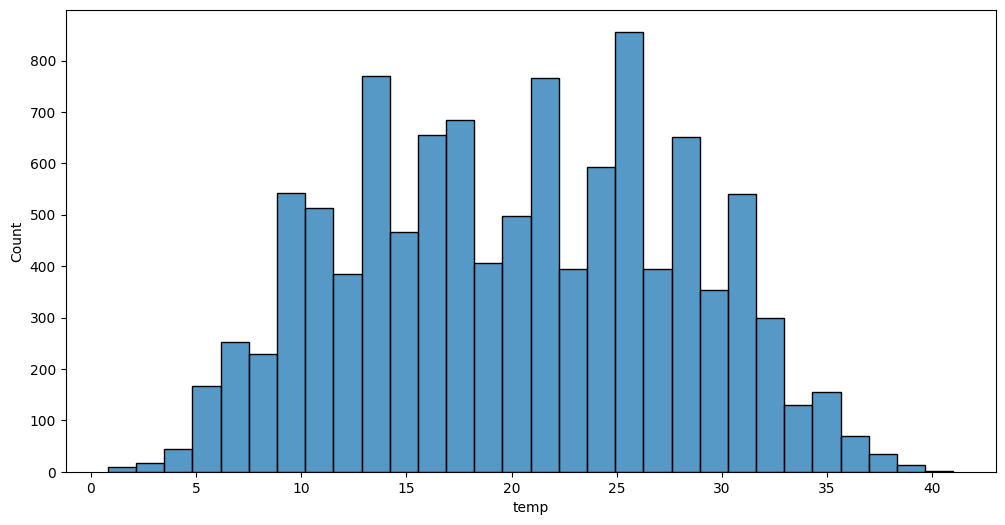

In [58]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='temp',bins=30)
plt.show()

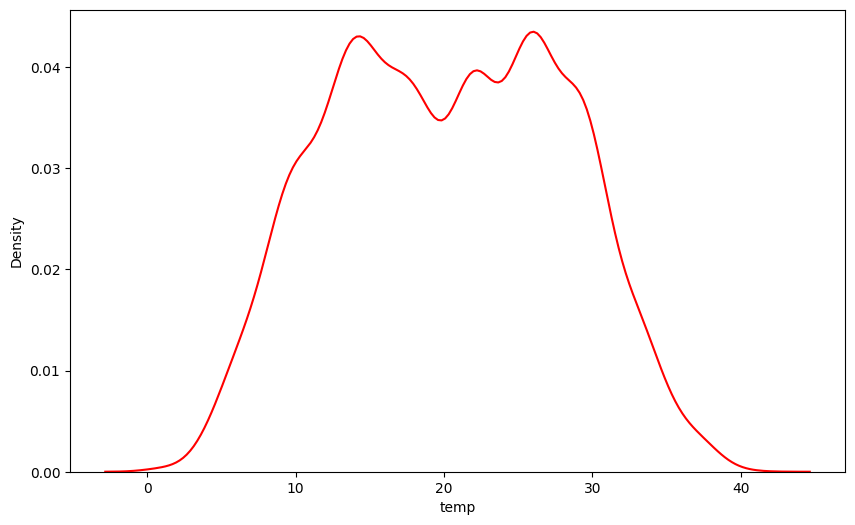

In [95]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=df['temp'],c='red')
plt.show()

### temp distribution can be broadly considered as normally distributed

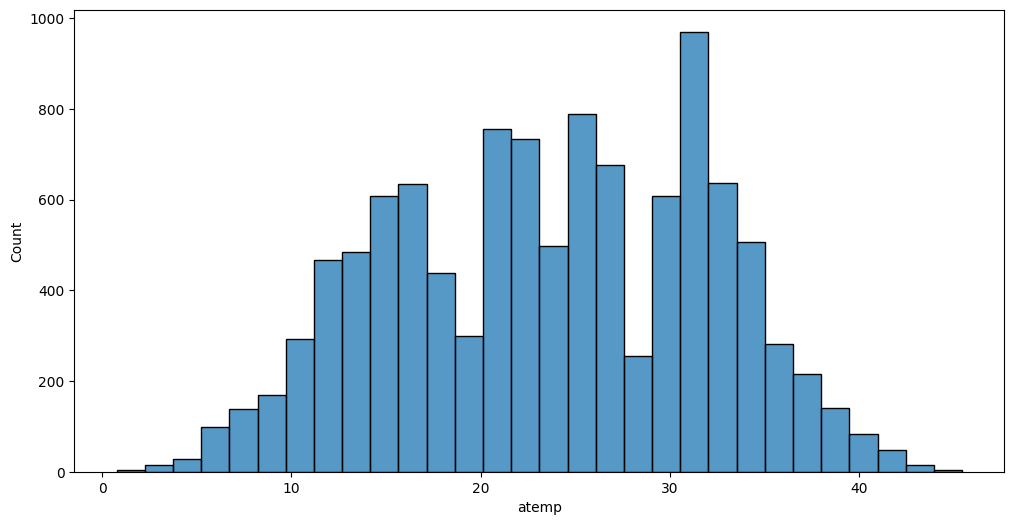

In [94]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='atemp',bins=30)
plt.show()

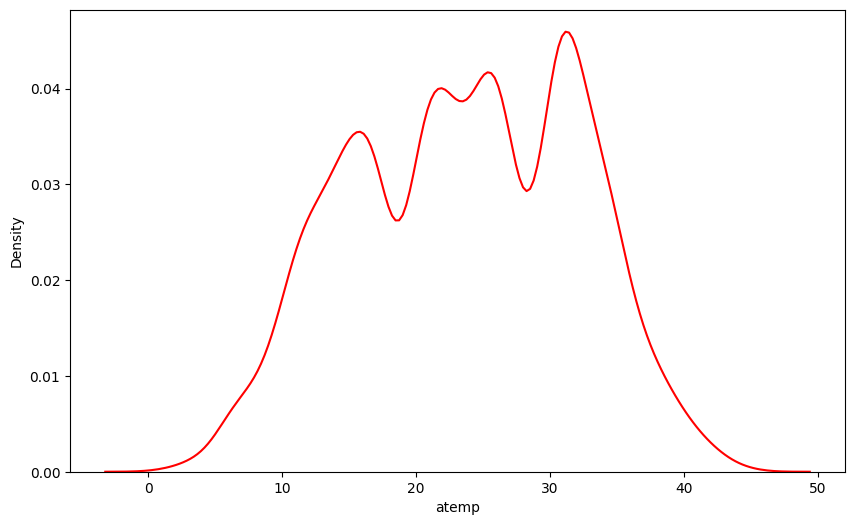

In [96]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=df['atemp'],c='red')
plt.show()

### atemp distribution can be broadly considered as normally distributed

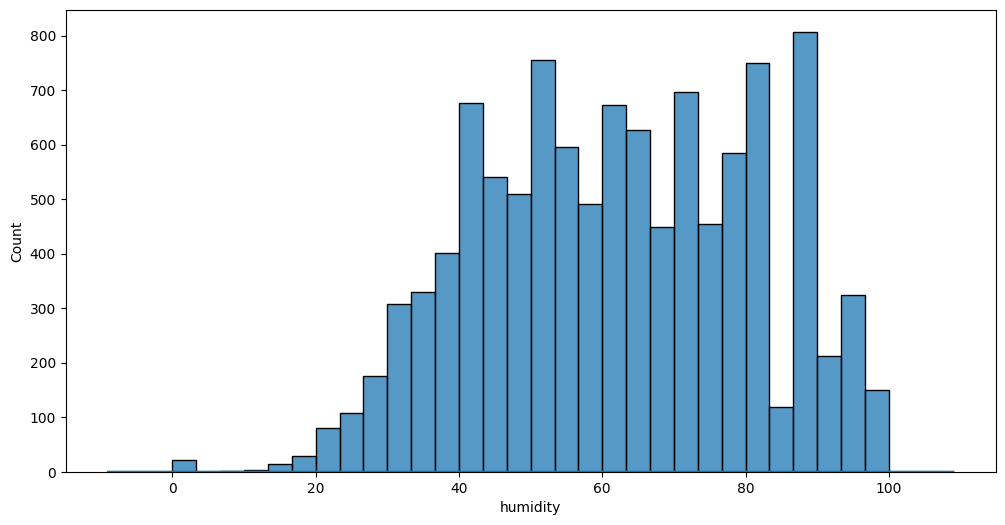

In [61]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='humidity',bins=30)
plt.show()

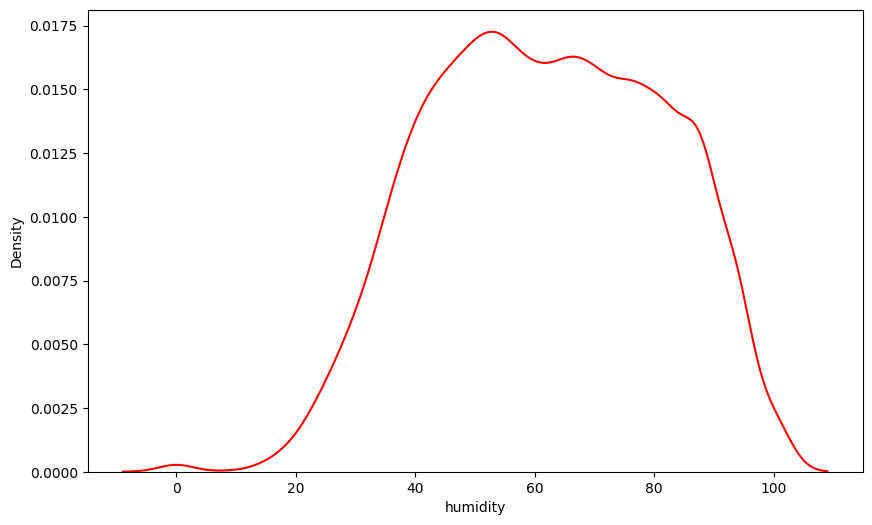

In [97]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=df['humidity'],c='red')
plt.show()

### humidity distribution can be broadly considered as normally distributed

### tried to see whether there are any fluctuations in bike usage over a period of time; 
### even though plot is very cluttered, increasing trend can be seen in usage of bike over a period of time;
### winter ( around Dec-Jan) shows dip in usage of bikes

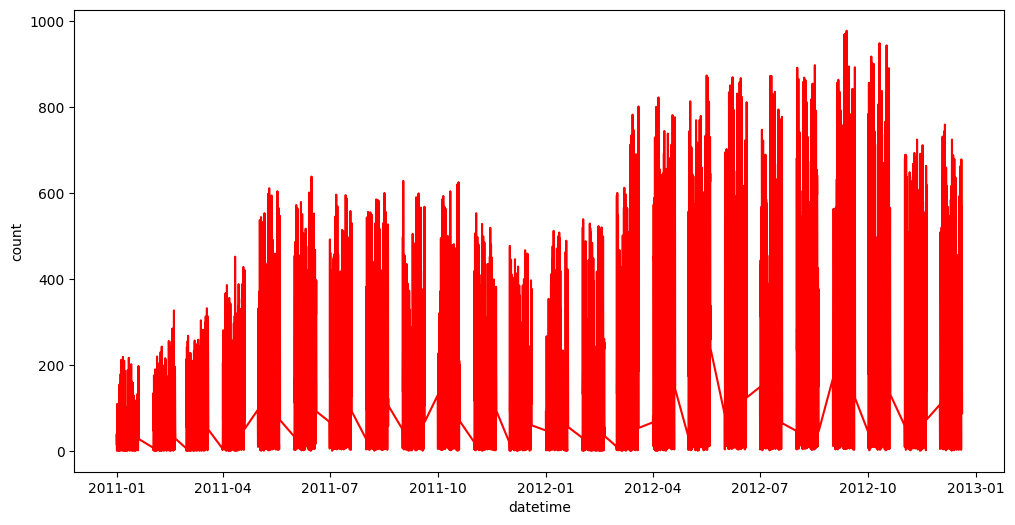

In [67]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='datetime',y='count',c='red')
plt.show()

### granularity is increased in subsequent steps in next few charts; 
### also month wise data has been plotted to see the trends more clearly

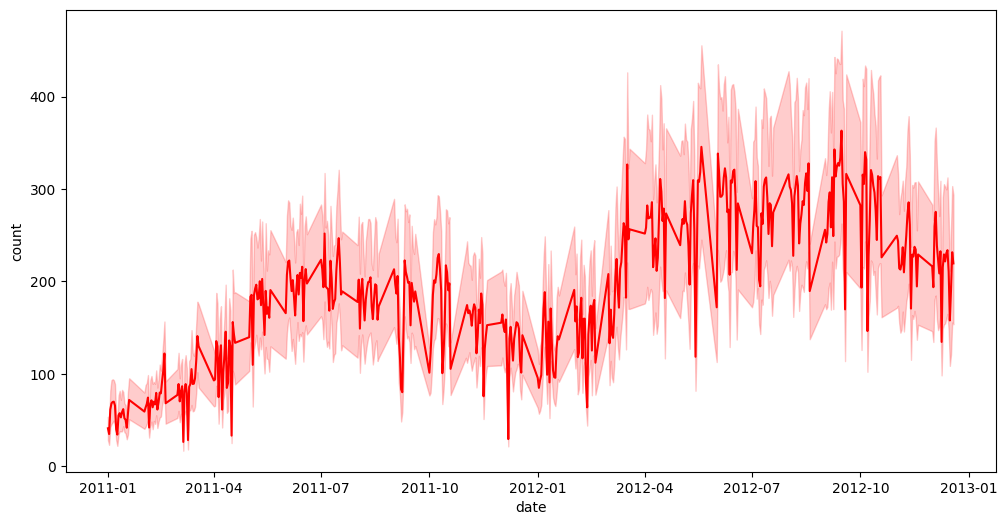

In [98]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date',y='count',c='red')
plt.show()

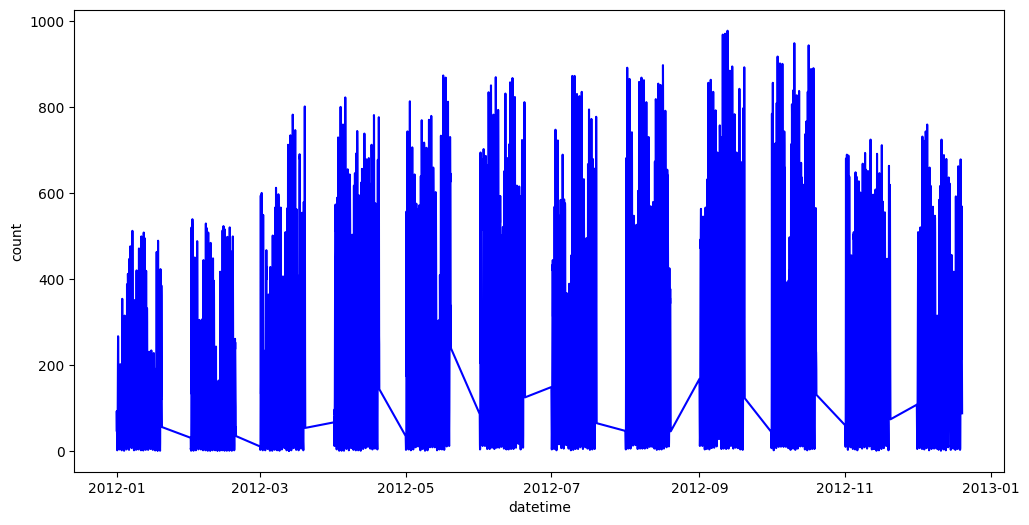

In [73]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df1, x='datetime',y='count',c='blue')
plt.show()

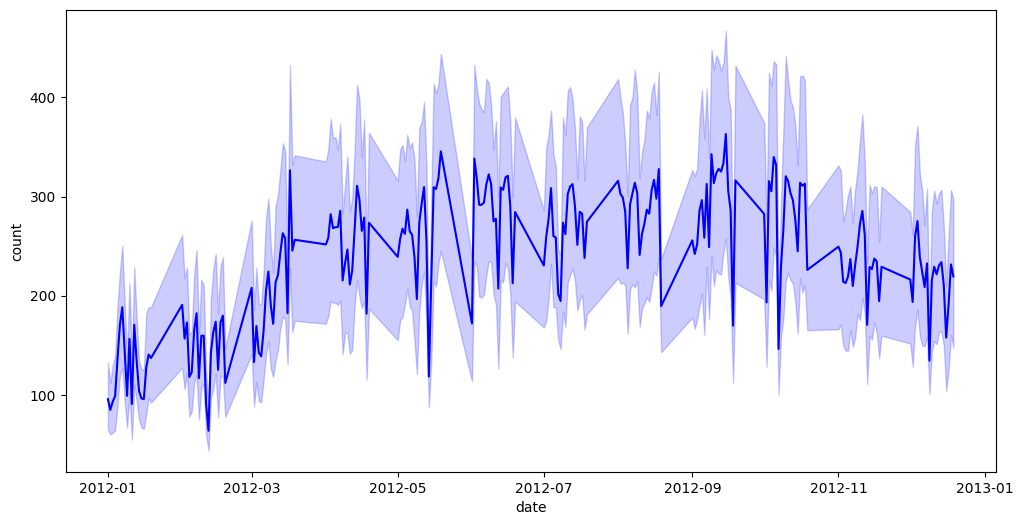

In [93]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df1, x='date',y='count',c='blue')
plt.show()

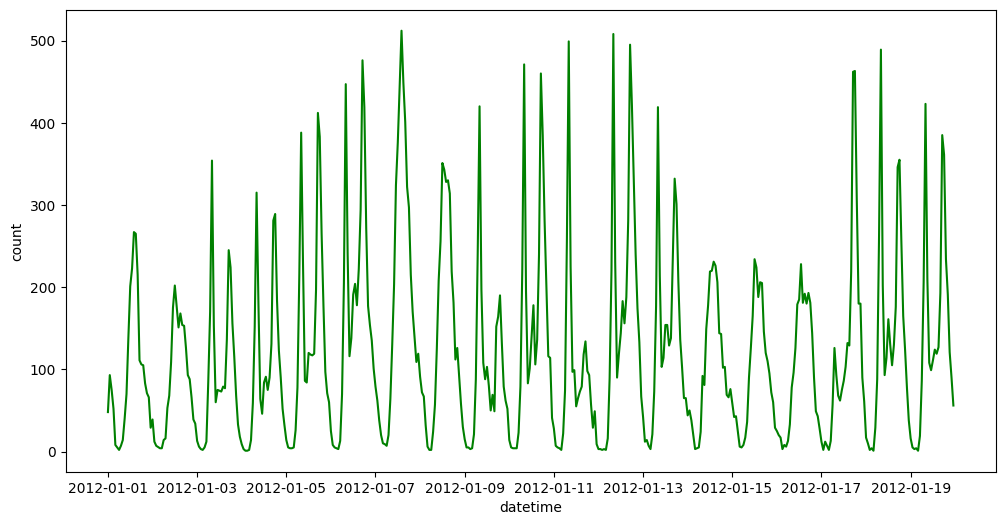

In [89]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df11, x='datetime',y='count',c='green')
plt.show()

### when I take datetime (timestamp) on x axis, chart is more cluttered... (above chart)
### when I take date on x axis, chart is more readable ( below chart)

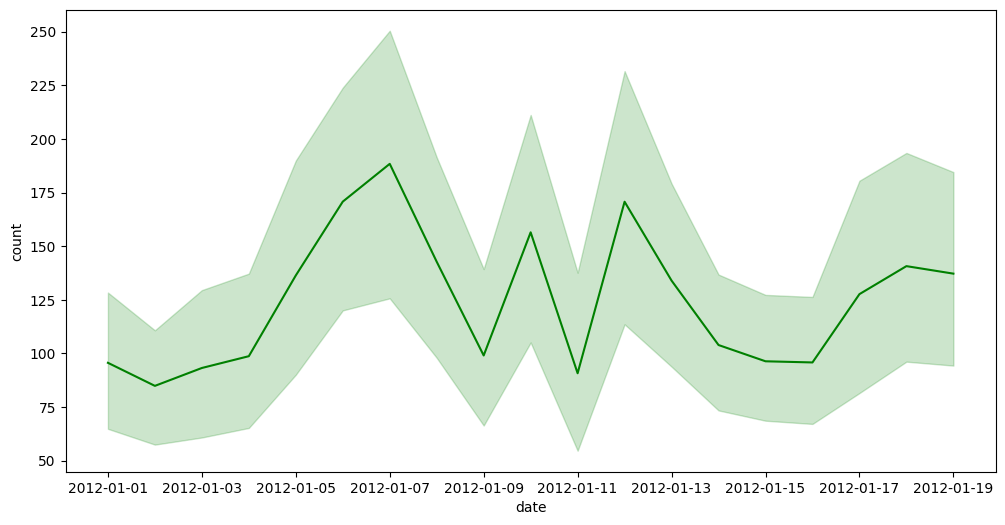

In [88]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df11, x='date',y='count',c='green')
plt.show()

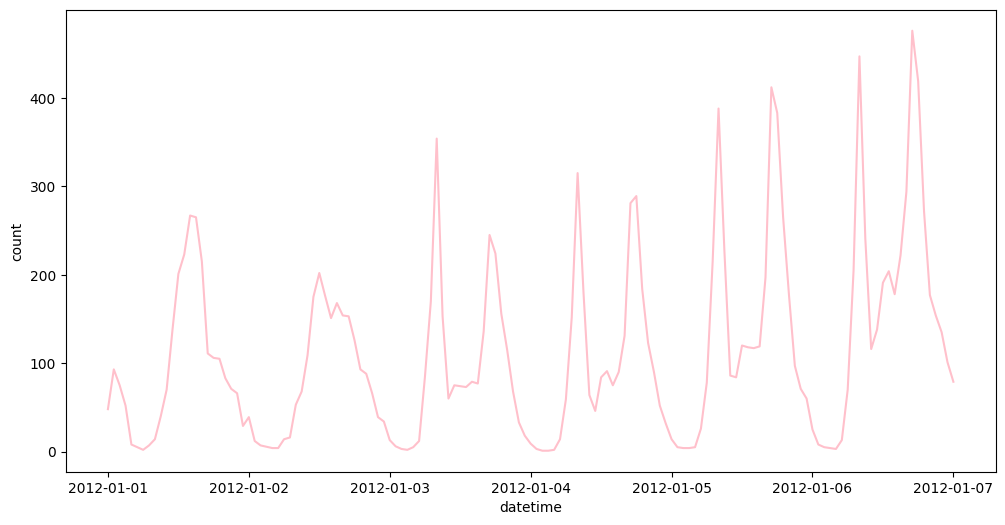

In [91]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df111, x='datetime',y='count',c='pink')
plt.show()

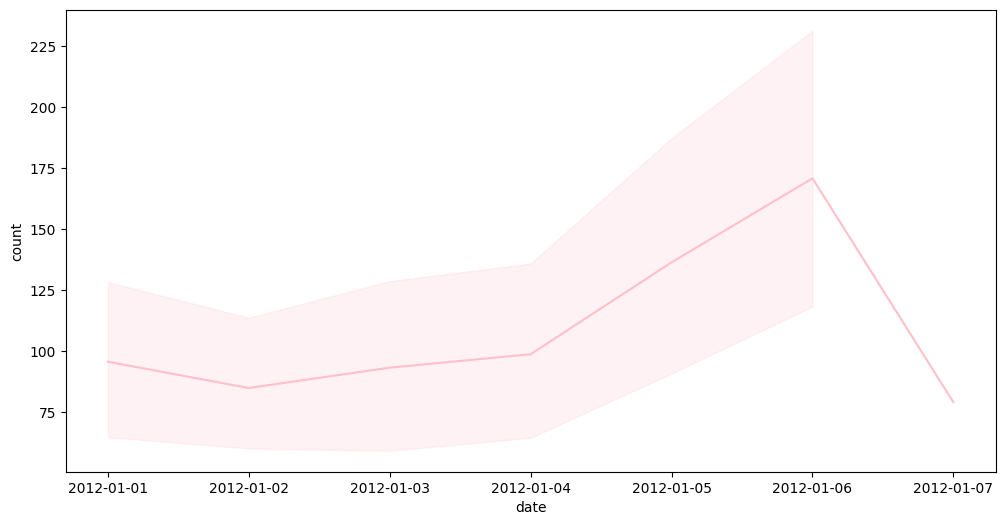

In [90]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df111, x='date',y='count',c='pink')
plt.show()

In [107]:
df_original=df_original.drop(columns='datetime')

In [108]:
df_original

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### correlation matrix is created to check the degree of correlation between features and target variable and ### also correlation among the features

In [109]:
df_original.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<Axes: >

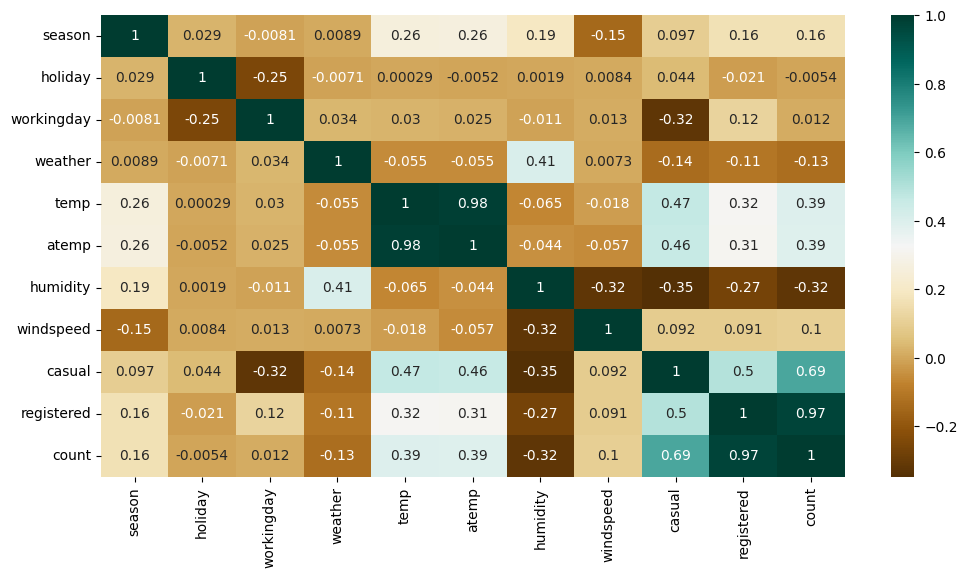

In [111]:
plt.figure(figsize=(12,6))
sns.heatmap(df_original.corr(),annot=True, cmap='BrBG')

#### qqplots have been plotted to check normality of feature data
#### (I dont know why 2 charts are coming for each  qq plot, even though they are same)

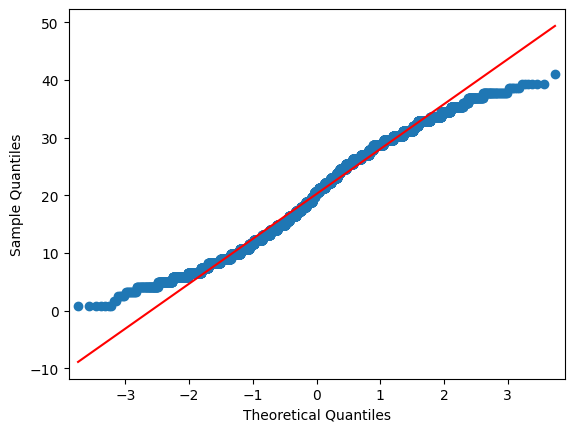

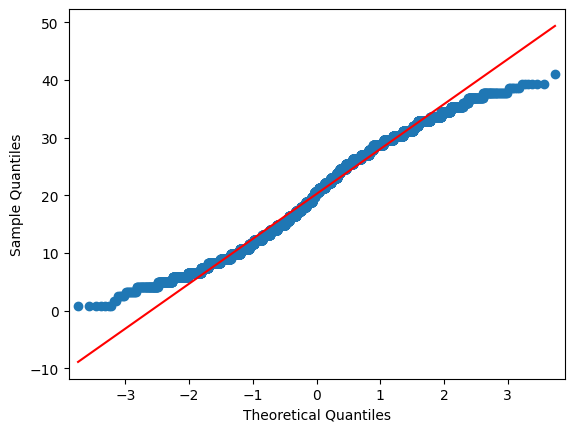

In [177]:
qqplot(df["temp"],line="s")

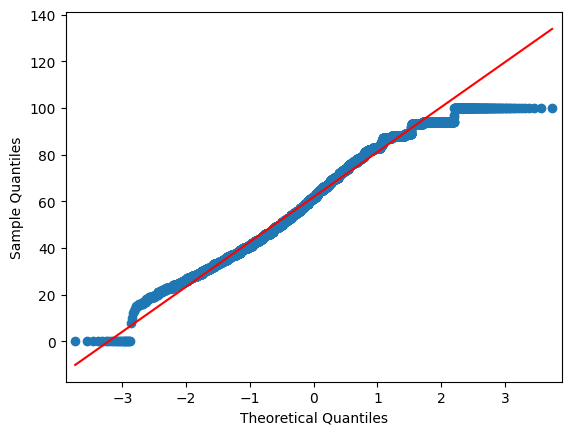

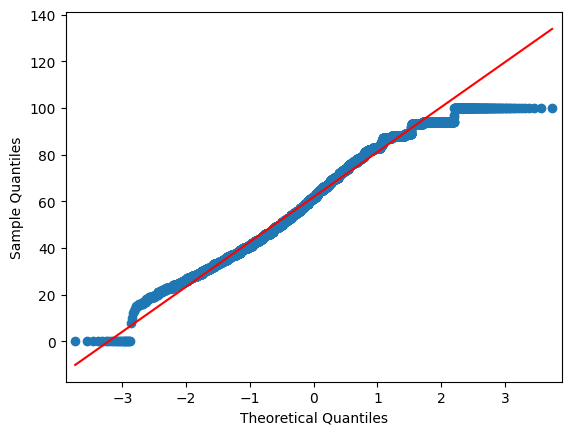

In [170]:
qqplot(df["humidity"],line="s")

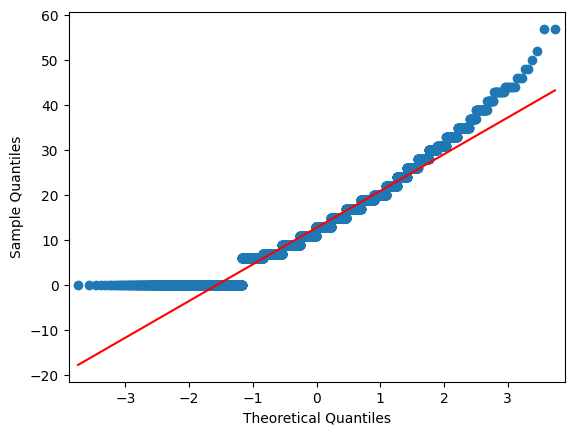

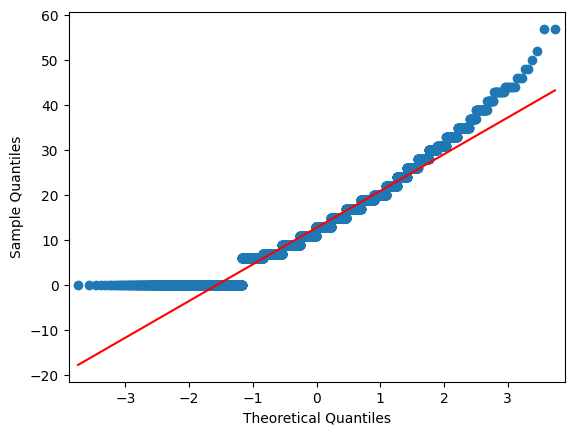

In [173]:
qqplot(df["windspeed"],line="s")

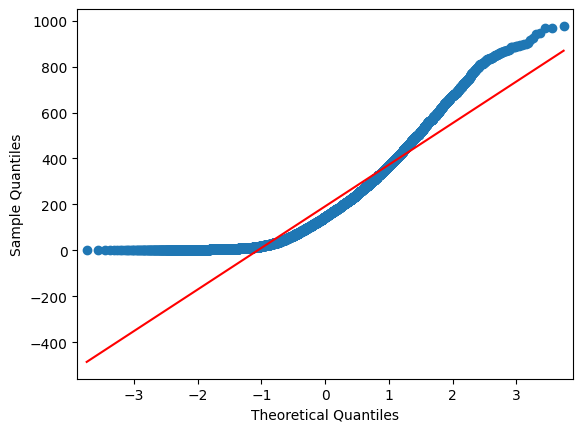

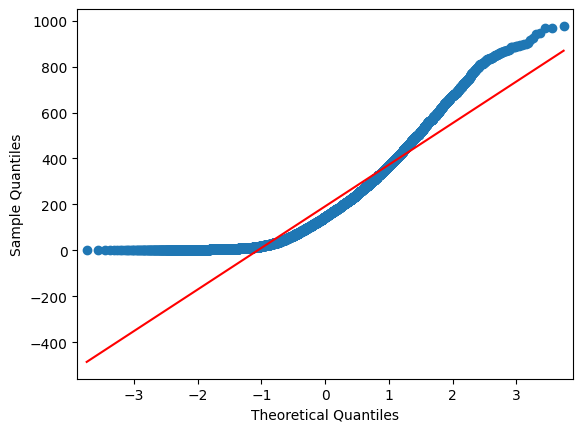

In [174]:
qqplot(df["count"],line="s")

### temp, humidity, windspeed features and count (target variable) do not show normality

#### from the correlation matrix we see working day feature has 0.012 correlation with count (bikes used or rented
#### also we can conduct a hypothesis test to check wthether working day has any effect on bike usage
#### before conducting 2 sample t tetst, we need to check whether variances are equal or not

In [120]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values

var1=np.var(data_group1)
var2=np.var(data_group2)

In [121]:
print(var1)

30171.346098942427


In [122]:
print(var2)

34040.69710674686


In [126]:
var2/var1

1.1282458858519429

In [113]:
data_group1

array([ 16,  40,  32, ..., 106,  89,  33], dtype=int64)

In [115]:
data_group1.shape

(3474,)

In [114]:
data_group2

array([  5,   2,   1, ..., 168, 129,  88], dtype=int64)

In [116]:
data_group2.shape

(7412,)

In [119]:
# Ho : Var is Equal
# Ha : Var is NOT Equal
# alpha = 0.05
levene(data_group1,data_group2)



LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

#### according to levene test, since p value is more than 0.05, we fail to reject null hypothesis; variances are equal

#### also the ratio  var1/var2 less than 4, we can say variances are equal; we can proceed with ttest

In [127]:
# Ho: working day has no effect on number of bikes used
# Ha: working day has effect on number of bikes used
# alpha=0.05

ttest_ind(data_group1, data_group2)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

#### p value is more than alpha, we fail to reject null hypothesis => working day feature has no effect on bikes used

<Axes: ylabel='Density'>

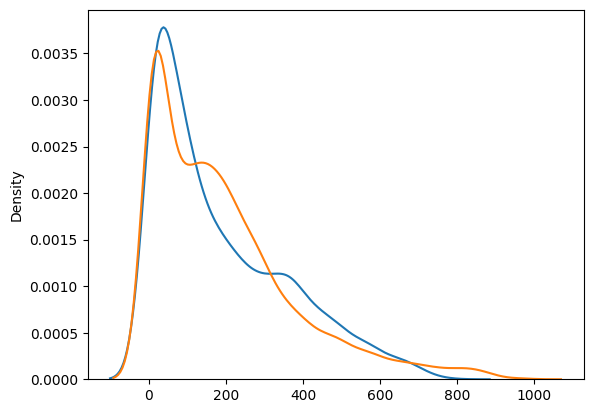

In [125]:
sns.kdeplot(data_group1)
sns.kdeplot(data_group2)

#### kde plot also shows NOT MUCH BIG difference between the distributions of  workingday=0 (not working day) and 
#### workingday=1

#### from correlation matrix we see correlation coefficient = 0.0089 between weather and season

#### for Testing whether weather and season are independent or ralated; we will do a chisqaure test to test this

In [ ]:
# Ho: weather and season are independent
# Ha: weather and season are NOT independent
# alpha=0.05 (significance level)

In [141]:
alpha=0.05

In [131]:
observed = pd.crosstab(df['season'], df['weather'])
print("observed values:")
observed

observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [136]:
chi_ststistic, p_value, dof,exp_values = chi2_contingency(observed)

In [137]:
chi_ststistic

49.158655596893624

In [138]:
p_value

1.549925073686492e-07

In [139]:
dof

9

In [140]:
exp_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [142]:
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject Null Hypothesis


#### weather and season are NOT independent ; they are dependent

## testing whether different weathers have impact on bike usage

### we will do ANOVA of all weathers with usage of bikes

In [ ]:
# Ho: bike usage is independent of weathers
# Ha: bike usage is dependent on atleast one weather
# alpha=0.05 (significance level)

In [149]:
w1 = df[df['weather']==1]['count'].values
w2 = df[df['weather']==2]['count'].values
w3 = df[df['weather']==3]['count'].values
w4 = df[df['weather']==4]['count'].values

In [150]:
f_statistic, p_value = f_oneway(w1,w2,w3,w4)

In [151]:
print('f_statistic', f_statistic)

f_statistic 65.53024112793271


In [152]:
print('p_value', p_value)

p_value 5.482069475935669e-42


In [153]:
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject Null Hypothesis


#### bike usage is dependent on atleast one weather
#### we can also see a correlation of (-0.13) between weather feature and bike usage (count) from correlation matrix


## testing whether different seasons have impact on bike usage

### we will do ANOVA of all seasons with usage of bikes

In [ ]:
# Ho: bike usage is independent of seasons
# Ha: bike usage is dependent on atleast one season
# alpha=0.05 (significance level)

In [154]:
s1 = df[df['season']==1]['count'].values
s2 = df[df['season']==2]['count'].values
s3 = df[df['season']==3]['count'].values
s4 = df[df['season']==4]['count'].values

In [155]:
f_statistic, p_value = f_oneway(s1,s2,s3,s4)

In [156]:
print('f_statistic', f_statistic)

f_statistic 236.94671081032106


In [157]:
print('p_value', p_value)

p_value 6.164843386499654e-149


In [158]:
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject Null Hypothesis


#### bike usage is dependent on atleast one season
#### we can also see a correlation of (0.16) between season feature and bike usage (count) from correlation matrix
